easy


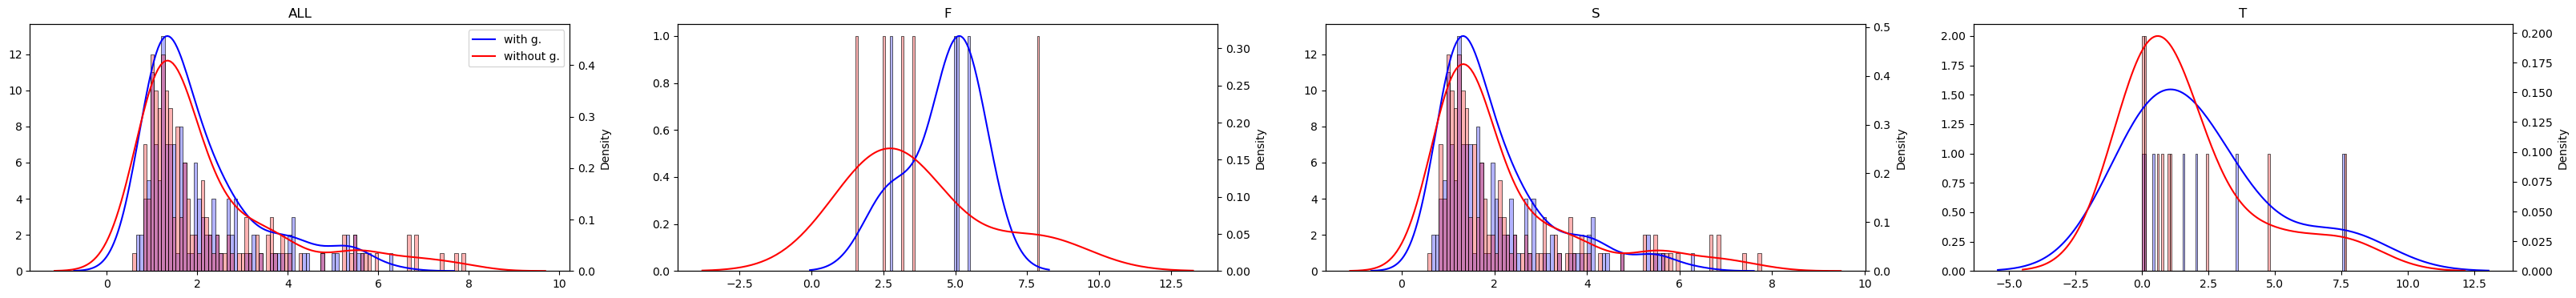

hard


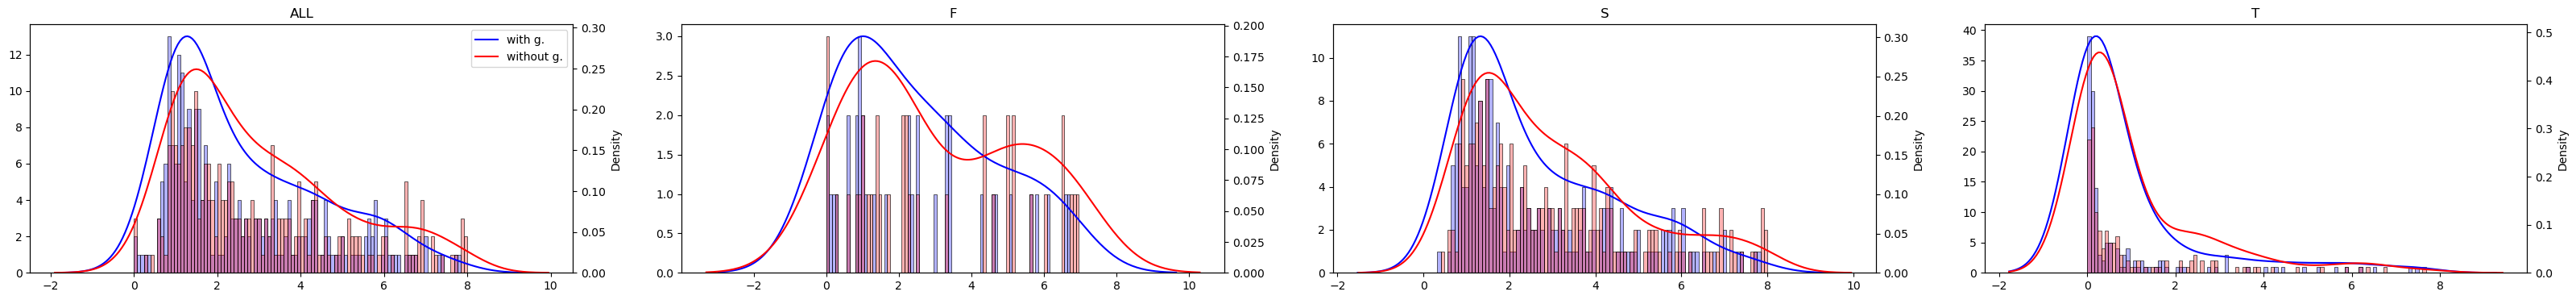

In [30]:
# plot Failure Length (FL) histogram colored by task
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#afi = ia.Performance.get_all_failure_intervals() # this gets "within-task" failure intervals
afi = ia.Performance.get_all_task_failure_intervals() # this gets "task" failure intervals

afi['score'] = afi['t2'] - afi['t1'] # Failure Length

def plot_guidance_hists(data, xlims, ax=None, bins=100):
    if ax is None:
        ax = plt.gca()
    data = data[data['score'] >= xlims[0]]
    data = data[data['score'] <= xlims[1]]
    score = data['score']
    #score = np.log10(1 + score)
    wg, wog = score[data['guidance'] == True], score[data['guidance'] == False]
    sns.histplot(wg, ax=ax, kde=False, alpha=0.3, bins=bins, binrange=xlims, label="with g.", color="blue")
    sns.histplot(wog, ax=ax, kde=False, alpha=0.3, bins=bins, binrange=xlims, label="without g.", color="red")
    
    ax2 = ax.twinx()
    sns.kdeplot(wg, ax=ax2, alpha=1, label="with g.", color="blue")
    sns.kdeplot(wog, ax=ax2, alpha=1, label="without g.", color="red")
        
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
for dif, data in afi.groupby('difficulty'):
    fig, axes = plt.subplots(ncols=4, figsize=(40,4))
    print(dif)
    xlims = (0,8) # throw away outliers (very long failure interval lengths)
    for task, ax in zip(ia.TASKS, axes.ravel()[1:]):
        group = data[data['task'] == task]
        ax.set_title(task)
        if len(group) == 0:
            continue
        plot_guidance_hists(group, xlims, ax=ax)
    plot_guidance_hists(data[data['task'] != 'T'], xlims, ax=axes[0])
    axes[0].set_title("ALL")
    plt.legend()
    plt.show()
    
    

In [ ]:
from scipy import stats
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def check_limits(x, xa, lims, alternative='two-sided', use_continuity=True, label="", ax=None, color=None):
    ps = []
    for lim in lims:
        _x = x[x['score'] < lim]
        _xa = xa[xa['score'] < lim]
        _x = _x[_x['score'] > 1]
        _xa = _xa[_xa['score'] > 1]
        result = stats.mannwhitneyu(_x['score'], _xa['score'], alternative=alternative, use_continuity=use_continuity)
        ps.append(result.pvalue)
    if ax is None:
        plt.figure()
        ax = plt.gca()
    label = {"greater" : "without g. > with g.", "less":"without g. < with g.", "two-sided":"without g. != with g."}[alternative]
    ax.plot(lims, ps, label=label, color=color)
    
plt.figure(figsize=(8,3))
ax = plt.gca()
ax.axhline(0.05, linestyle="--", color="black", label="0.05 conf.")
ax.set_xscale('log')

MIN = 1.1

Alims = np.logspace(np.log10(MIN), np.log10(max(sA['score'].max(), saA['score'].max())), 50)
check_limits(sA, saA, lims=Alims, ax=ax, label="A", )
check_limits(sA, saA, lims=Alims, ax=ax, label="A", alternative="greater")
check_limits(sA, saA, lims=Alims, ax=ax, label="A", alternative="less")
plt.suptitle(f"Wilcoxon Easy")
#plt.legend(loc="upper right")
plt.savefig("./results/wilcoxon-easy.png", bbox_inches="tight")


plt.figure(figsize=(8,3))
ax = plt.gca()
ax.axhline(0.05, linestyle="--", color="black", label="0.05 conf.")
ax.set_xscale('log')

Blims = np.logspace(np.log10(MIN), np.log10(max(sB['score'].max(), saB['score'].max())), 50)
check_limits(sB, saB, lims=Blims, ax=ax, label="B")
check_limits(sB, saB, lims=Blims, ax=ax, label="B", alternative="greater")
check_limits(sB, saB, lims=Blims, ax=ax, label="B", alternative="less")
plt.suptitle(f"Wilcoxon Hard")
plt.savefig("./results/wilcoxon-hard.png", bbox_inches="tight")


easy


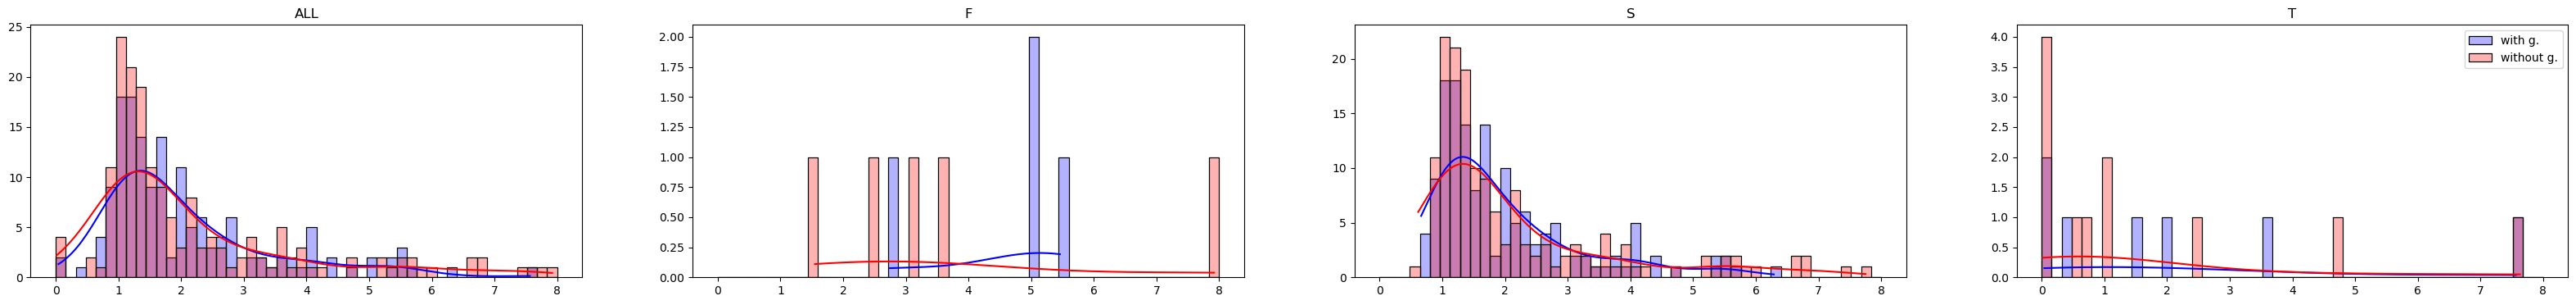

hard


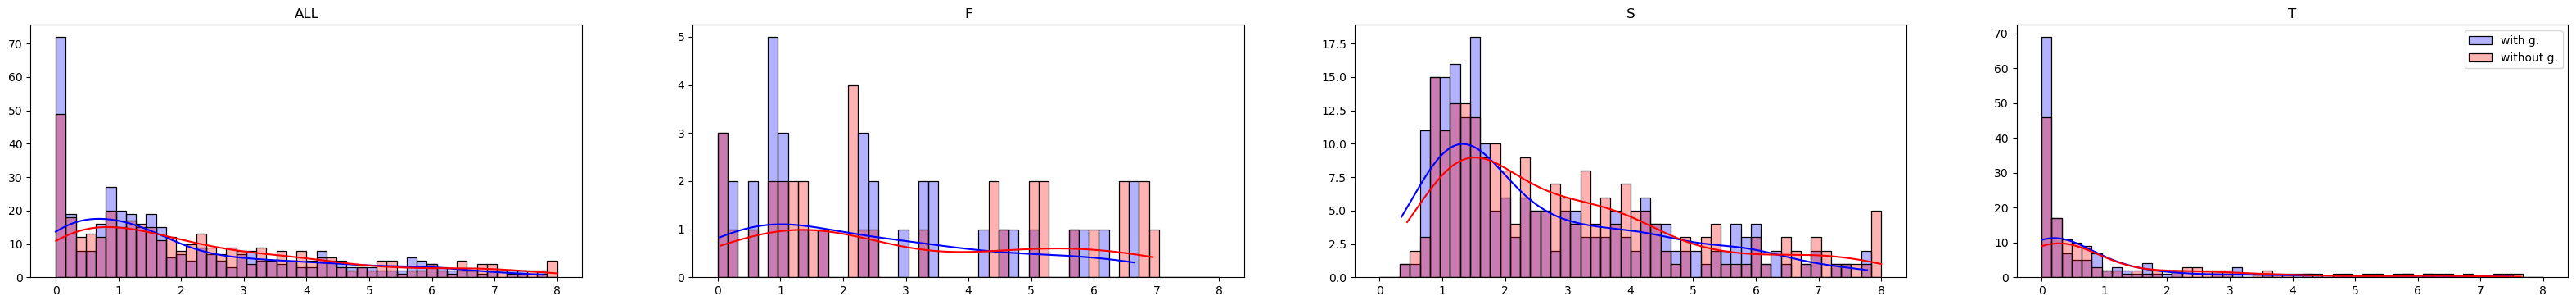

In [11]:
# plot Failure Length (FL) histogram colored by task

import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


afi = ia.Performance.get_all_task_failure_intervals()
afi['score'] = afi['t2'] - afi['t1'] # Failure Length

def plot_guidance_hists(data, xlims, ax=None):
    if ax is None:
        ax = plt.gca()
    data = data[data['score'] >= xlims[0]]
    data = data[data['score'] <= xlims[1]]
    score = data['score']
    #score = np.log10(1 + score)
    wg, wog = score[data['guidance'] == True], score[data['guidance'] == False]
    sns.histplot(wg, ax=ax, kde=True, alpha=0.3, bins=50, binrange=xlims, label="with g.", color="blue")
    sns.histplot(wog, ax=ax, kde=True, alpha=0.3, bins=50, binrange=xlims, label="without g.", color="red")
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
    
for dif, data in afi.groupby('difficulty'):
    fig, axes = plt.subplots(ncols=4, figsize=(40,4))
    print(dif)
    xlims = (0,8) # throw away outliers (very long failure interval lengths)
    
    for task, ax in zip(ia.TASKS, axes.ravel()[1:]):
        group = data[data['task'] == task]
        ax.set_title(task)
        if len(group) == 0:
            continue
       
        plot_guidance_hists(group, xlims, ax=ax)
        
    
    plot_guidance_hists(data, xlims, ax=axes[0])
    axes[0].set_title("ALL")
    plt.legend()
    
    
        
    
    plt.show()
    #print(par, task, dif)
    
    
    

task          F  S  T
participant          
P01           0  2  0
P02          14  7  0
P04           0  4  0
P05           0  5  0
P06          13  5  0
P07           0  1  0
P08           4  1  0
P09          13  6  0
P10           0  1  0
P16          10  7  0
P17           0  3  0
P18           0  0  0
P23           0  1  0
P24          17  6  0
P25          17  4  0
task          F   S  T
participant           
P01           4   3  0
P02          16  11  0
P04          11   8  0
P05          10  17  0
P06          18   9  0
P07           4   5  0
P08           3  14  0
P09           6  19  0
P10          13  17  0
P16          12  19  0
P17          10  13  0
P18           0  17  0
P23          11   9  0
P24          12   6  0
P25          11  13  0


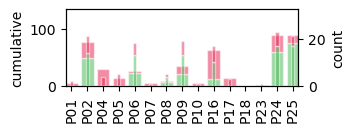

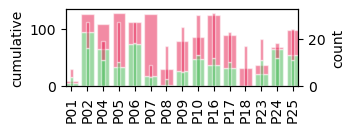

In [4]:
# Compute stats for guidance and plot (cumulative and count)

# NOTE: it is clear from plots of the number of eyetracking events (and see next cell) that:
# P07 Ba and P18 Aa 
# are not valid for further analysis as guidance will have been affected by an eyetracking failure (or they looked away.
# also of interest is P10 icuaB which has an overlapping guidance interval, this likely means that the tasks failed at the same tick (from the agent simulation perspective)

import icua_analysis as ia
import pandas as pd
import matplotlib.pyplot as plt

y1max = 0   
y2max = 0

axes = []

df = ia.get_guidance_stats()

for trial, trial_df in df.groupby('trial'):
    colors = {task:ia.get_task_properties(task)['color'] for task in df['task'].unique()}
        
    pivot_df = trial_df.pivot(index='participant', columns='task', values='guidance_cumulative')
    pivot_df = pivot_df[['F', 'S', 'T']] # order for stacking bar chart
    
    fig = plt.figure(figsize=(3,1))
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    
    pivot_df.plot(kind='bar', stacked=True, ax=ax1, color=colors, edgecolor="white", alpha=0.5, legend=False, width=0.8)
    
    pivot_df = trial_df.pivot(index='participant', columns='task', values='guidance_count')
    pivot_df = pivot_df[['F', 'S', 'T']] # order for stacking bar chart
    print(pivot_df)
    pivot_df.plot(kind='bar', stacked=True, ax=ax2, color=colors, alpha=0.5, edgecolor="white", legend=False, width=0.2)
    
    y1max = max(ax1.get_ylim()[1], y1max)
    y2max = max(ax2.get_ylim()[1], y2max)
    
    axes.append((trial, ax1, ax2, fig))
    
for trial, ax1, ax2, fig in axes:
    ax1.set_ylim(0, y1max)
    ax2.set_ylim(0, y2max)    
    ax1.set_ylabel("cumulative")
    ax2.set_ylabel("count")
    ax1.set_xlabel(None)
    ax2.set_xlabel(None)
    fig.savefig(f'../result/guidance_cumulative_and_count-{trial}.png', bbox_inches="tight", dpi=300)
 

In [ ]:
import icua_analysis as ia 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_fl(data):
    fi = ia.get_all_task_failure_intervals(data) # compute failure intervals
    scores = {task : (intervals['t2'] - intervals['t1']).to_numpy() for task, intervals in fi.items()}
    scores = {task : score[score > 0] for task, score in scores.items()} # some are 0... this is weird...
    return scores






('icuaA', 'F')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()


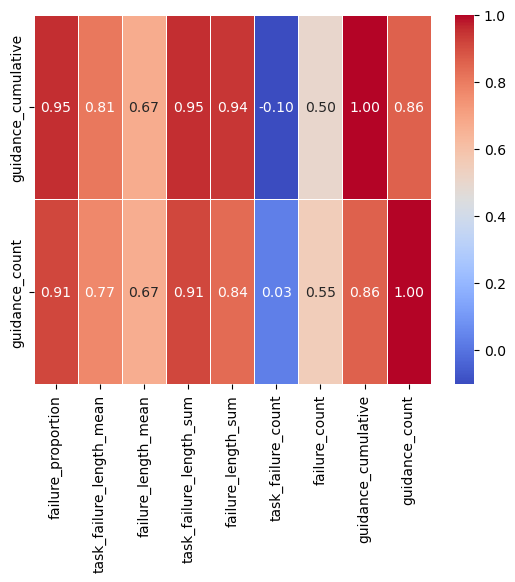

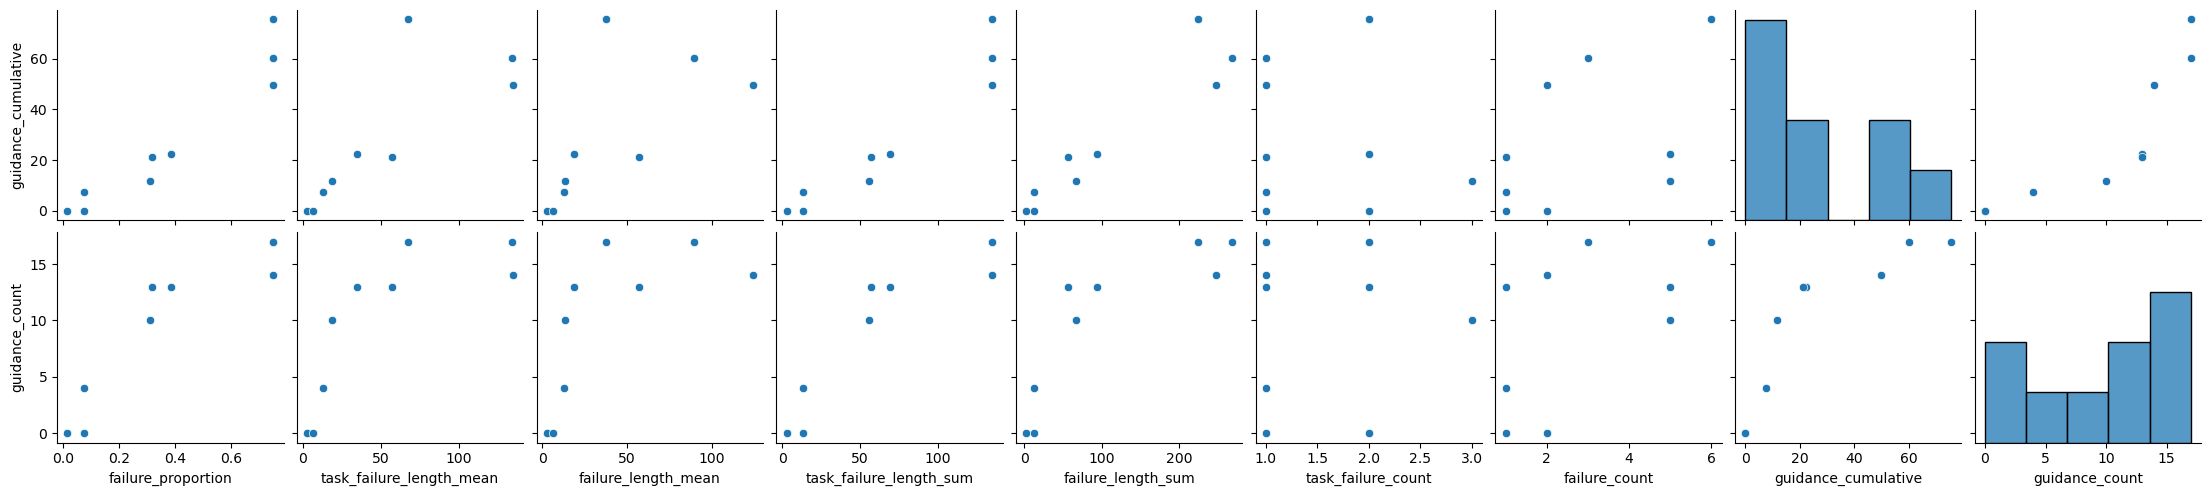

('icuaA', 'S')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()


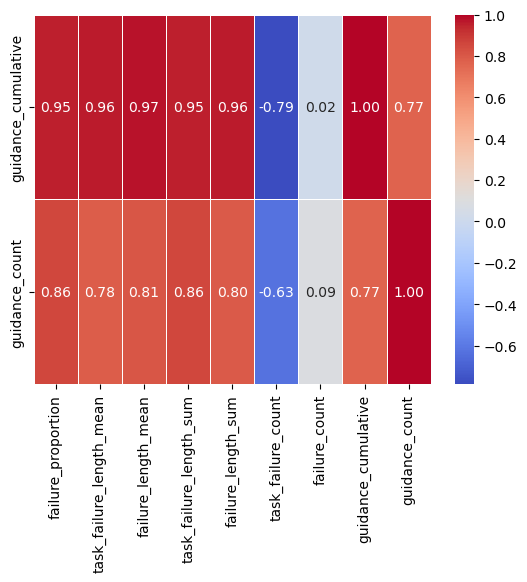

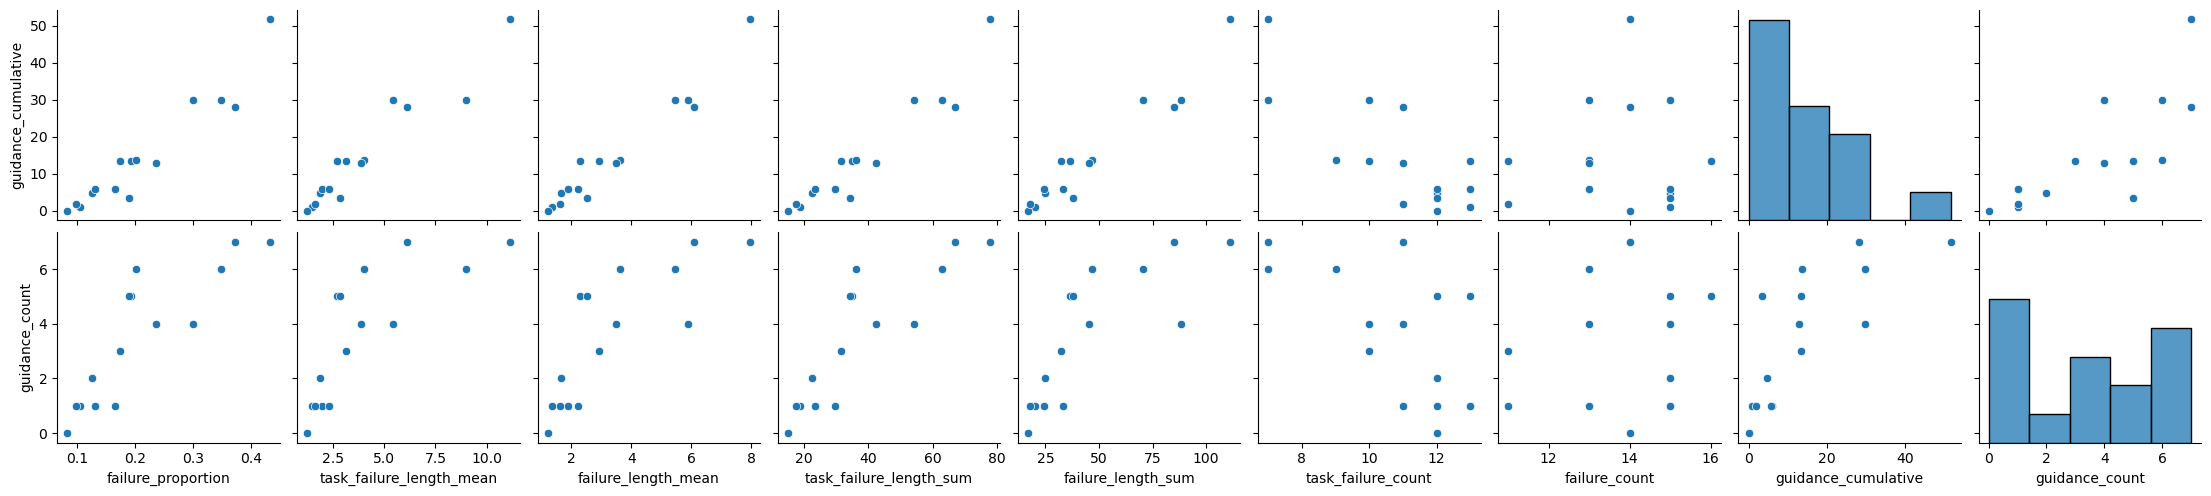

('icuaA', 'T')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


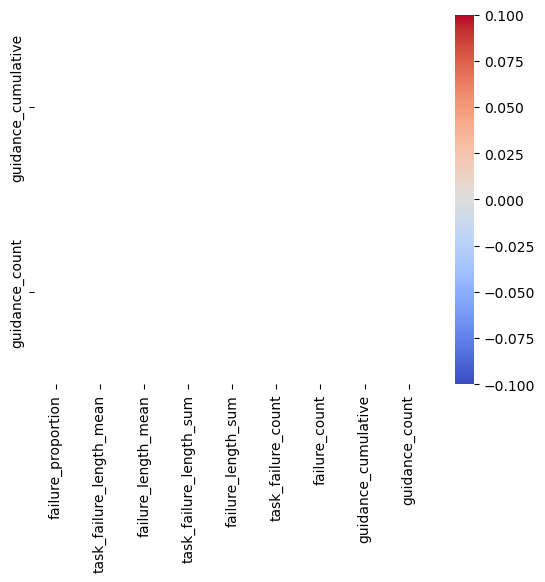

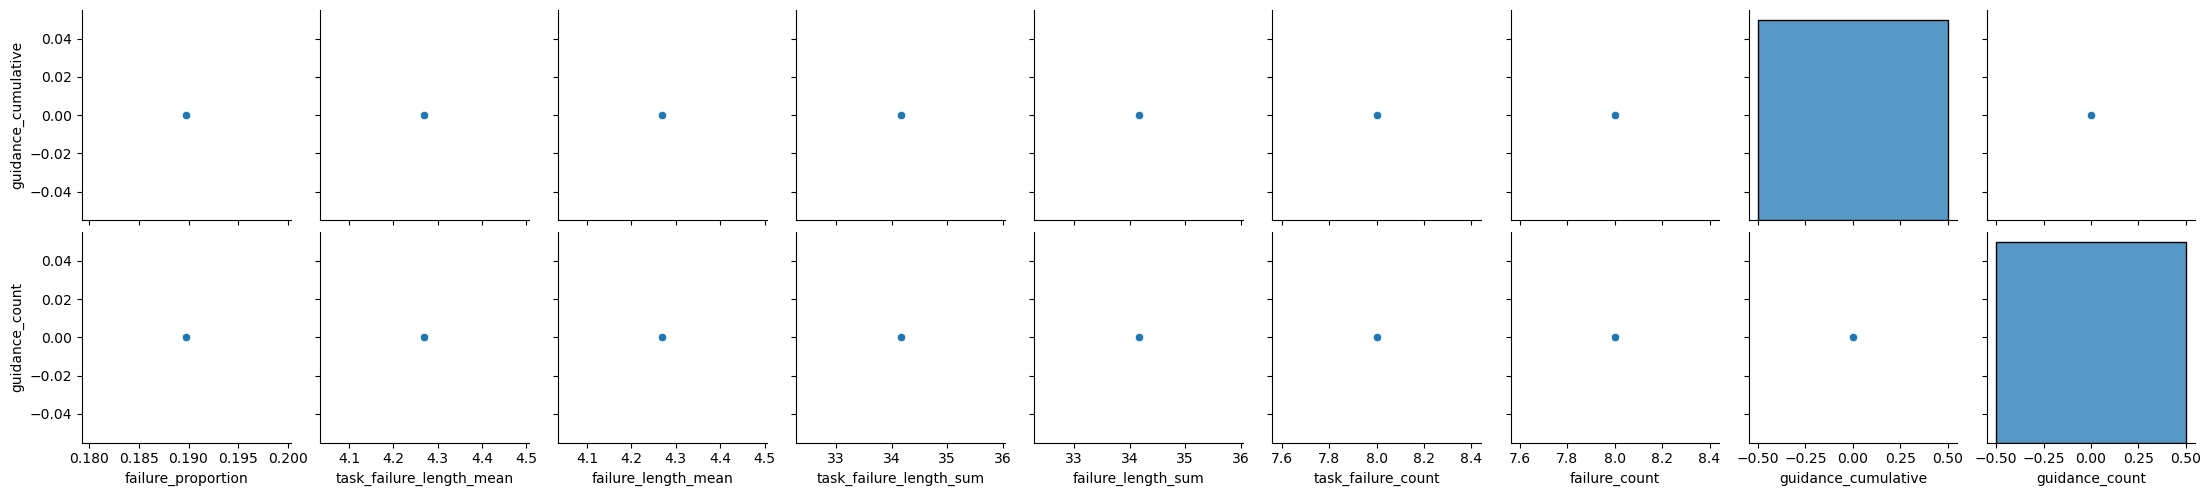

('icuaB', 'F')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()


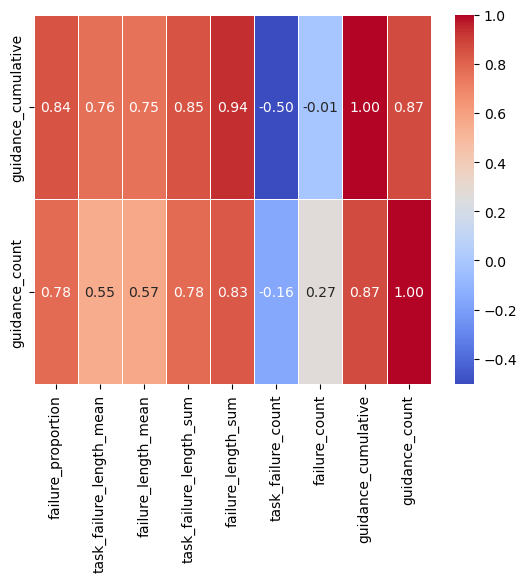

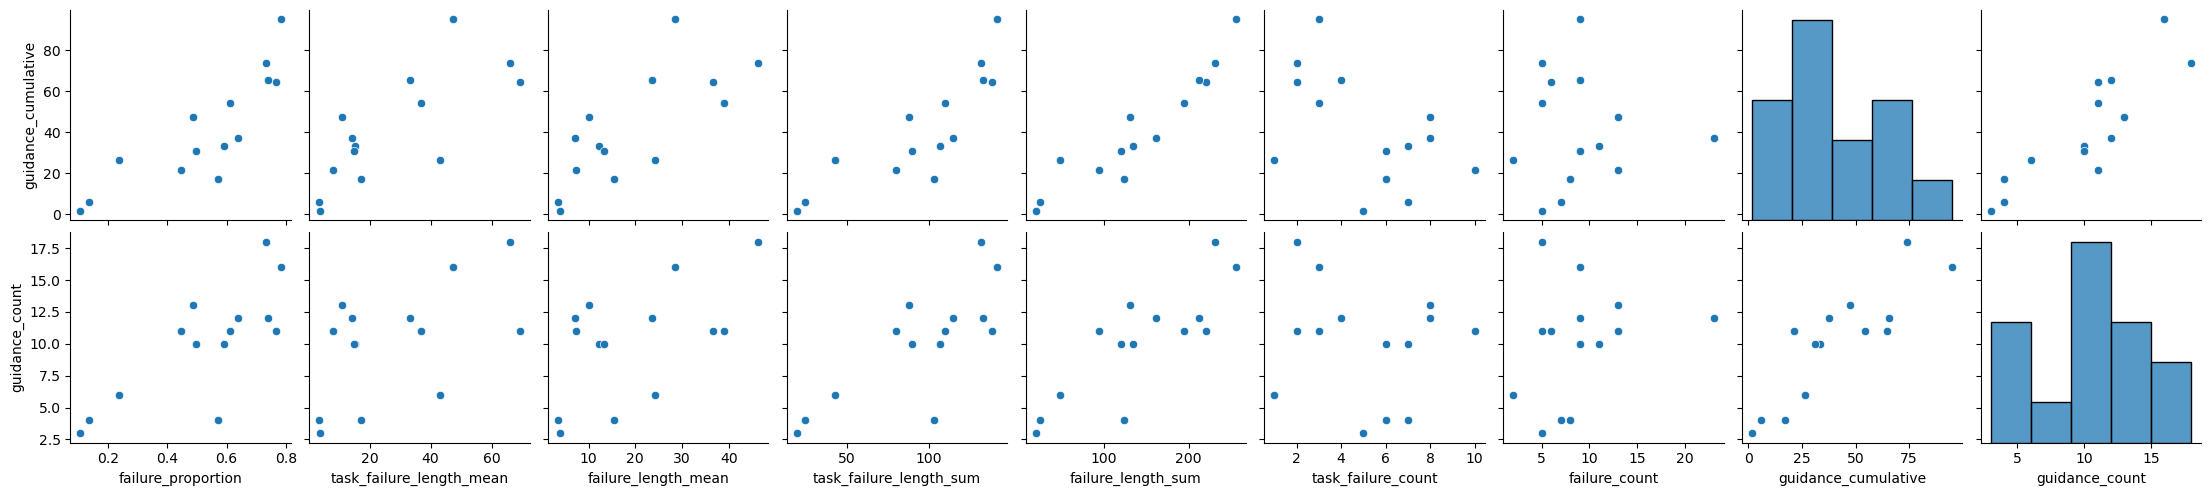

('icuaB', 'S')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()


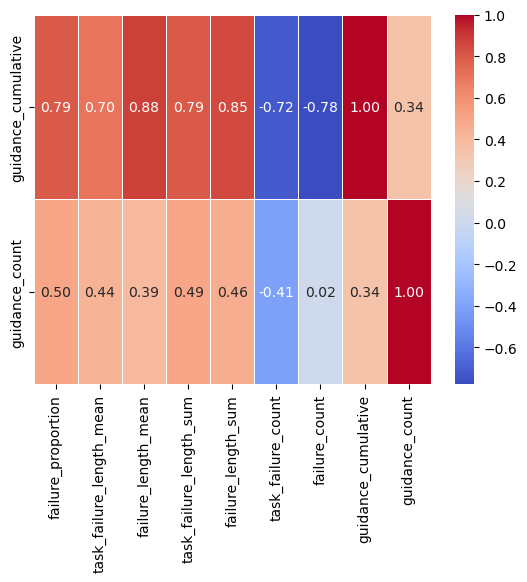

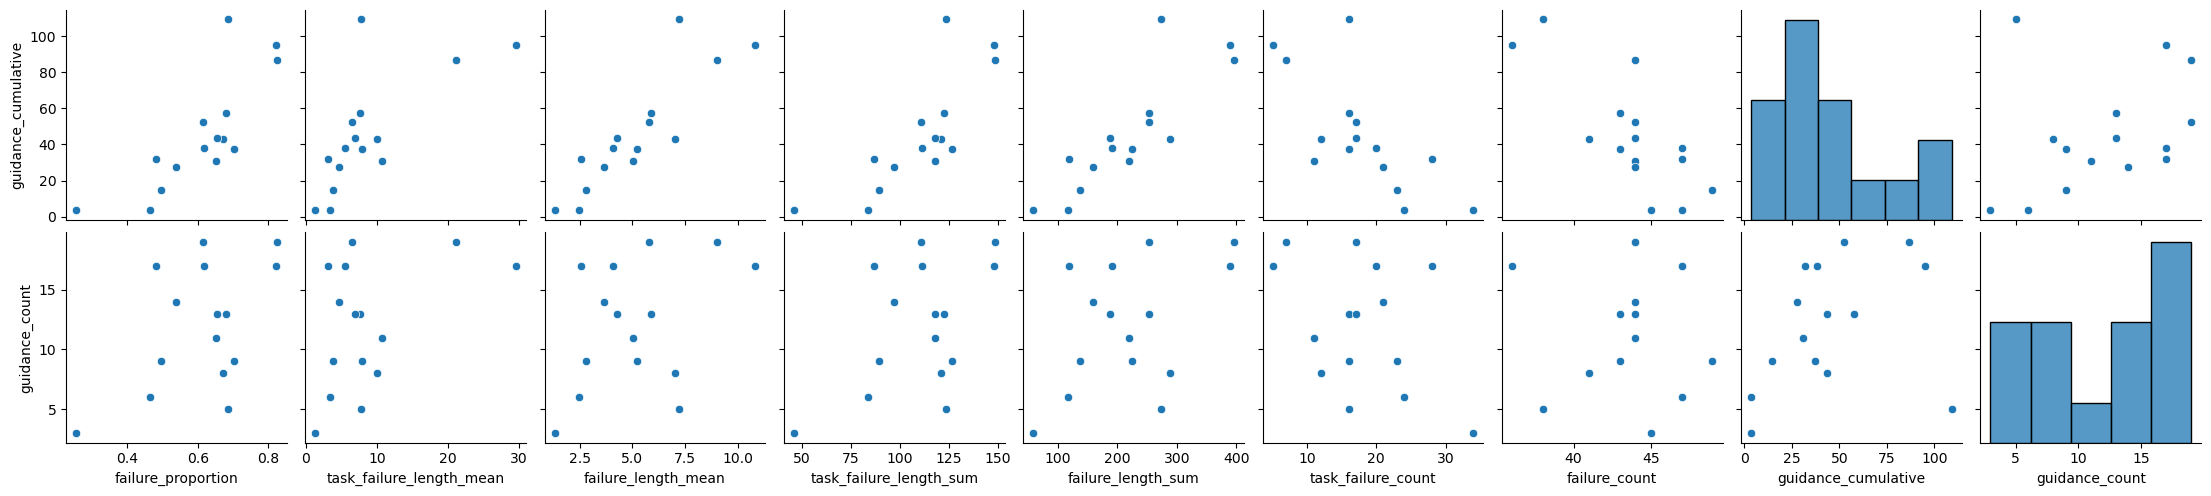

('icuaB', 'T')


/tmp/ipykernel_40134/3795495422.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = group.corr()
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/ben/anaconda3/envs/icua/lib/python3.10/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


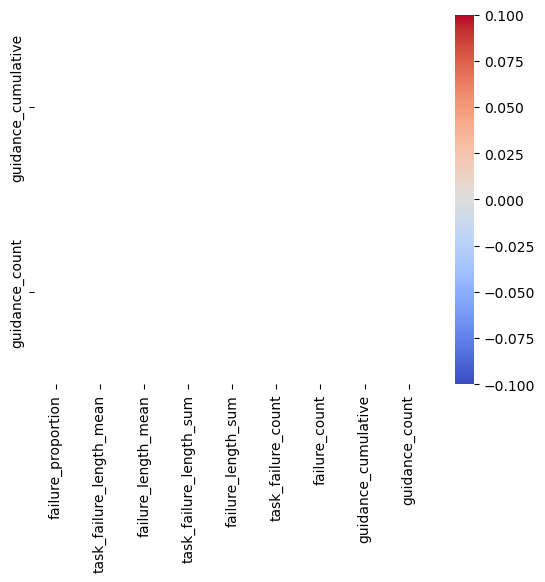

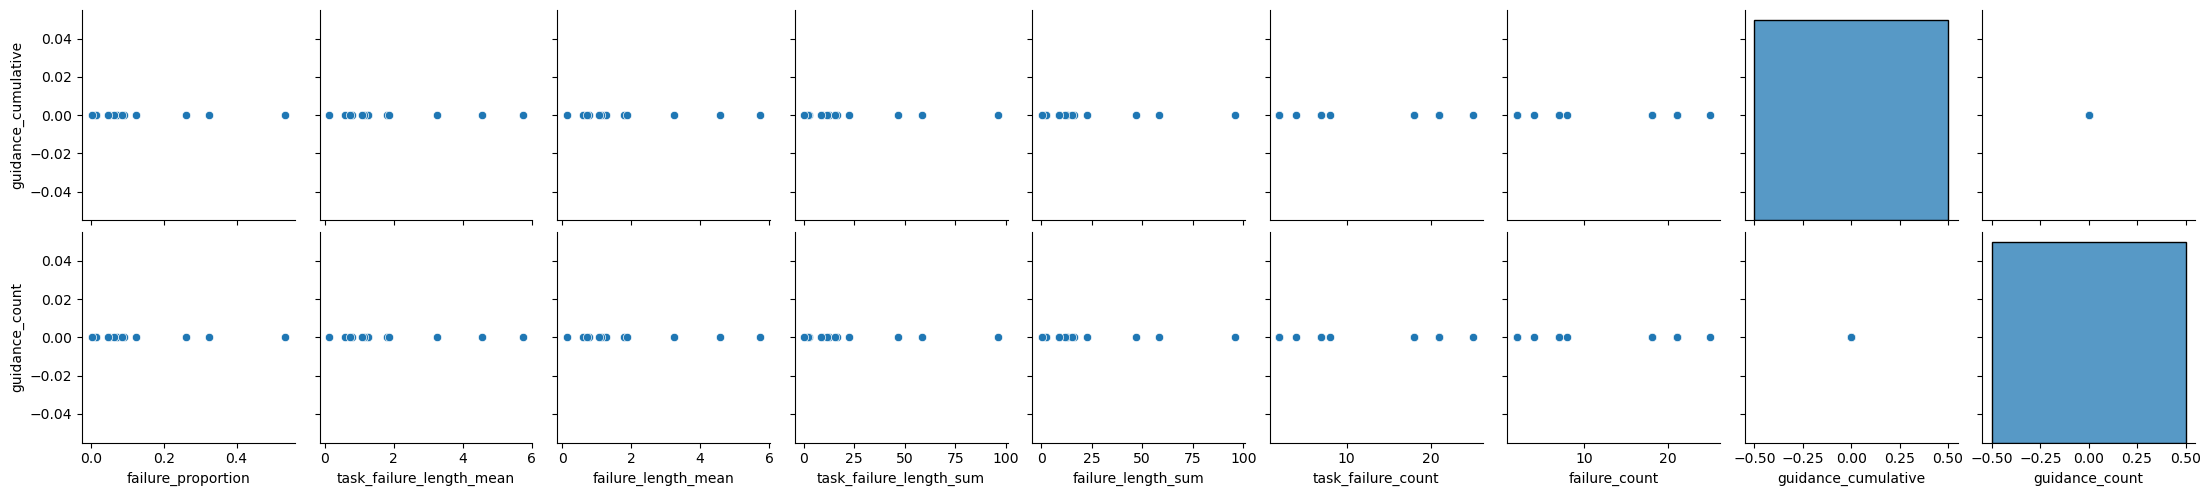

In [3]:
# check correlation between guidance stats and performance measures

import numpy as np
import pandas as pd
import icua_analysis as ia
import matplotlib.pyplot as plt
import seaborn as sns


guid = ia.get_guidance_stats()
# aggregate over tasks
#guid = guid.groupby(['participant', 'trial'])[['guidance_cumulative', 'guidance_count']].sum().reset_index()

# get performance stats
perf = ia.default_performance().merge(guid, on=['participant', 'trial', 'task'])

x_vars=['guidance_cumulative', 'guidance_count']

for trial, group in perf.groupby(['trial', 'task']):
    print(trial)
    # Compute the correlation matrix
    corr_matrix = group.corr()
    sns.heatmap(corr_matrix[x_vars].T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.show()
    sns.pairplot(group, y_vars=x_vars )
    plt.show()



P01 icuaA


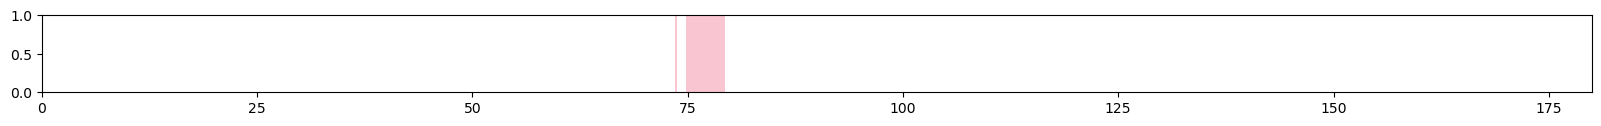

P02 icuaA


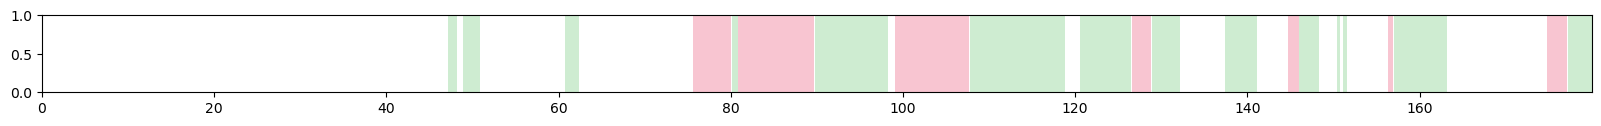

P04 icuaA


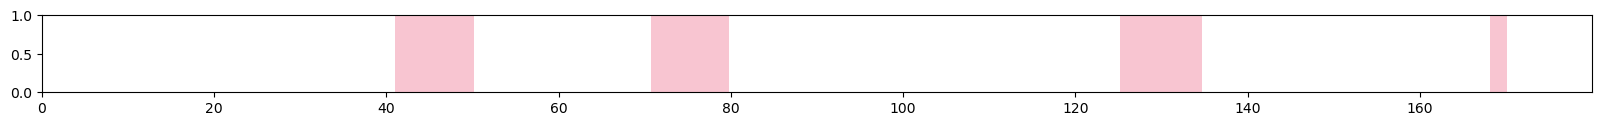

P05 icuaA


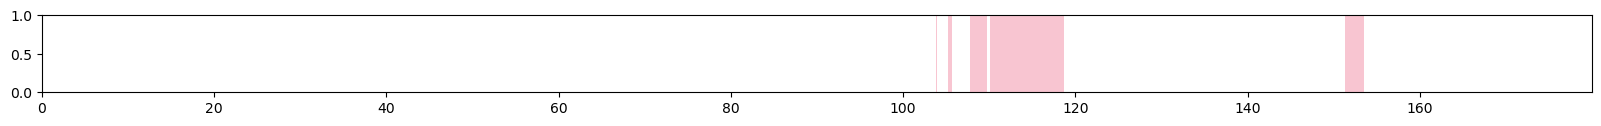

P06 icuaA


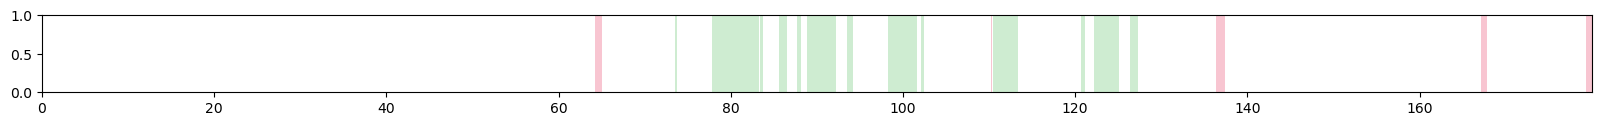

P07 icuaA


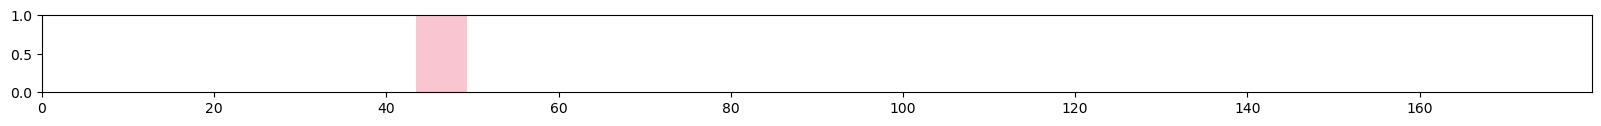

P08 icuaA


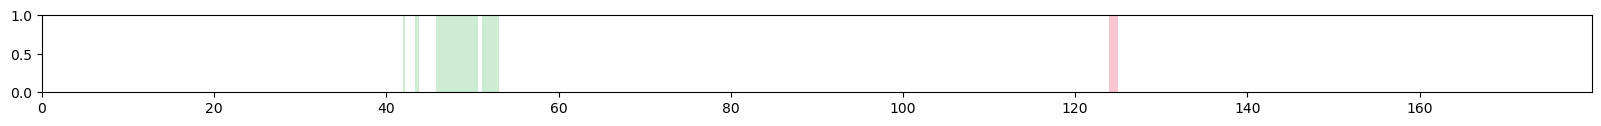

P09 icuaA


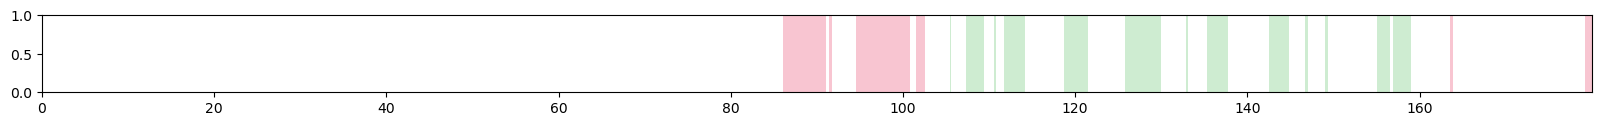

P10 icuaA


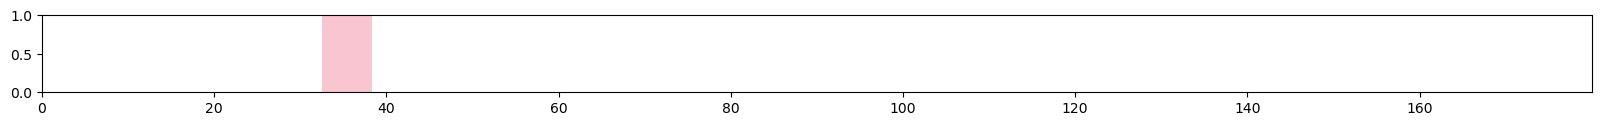

P16 icuaA


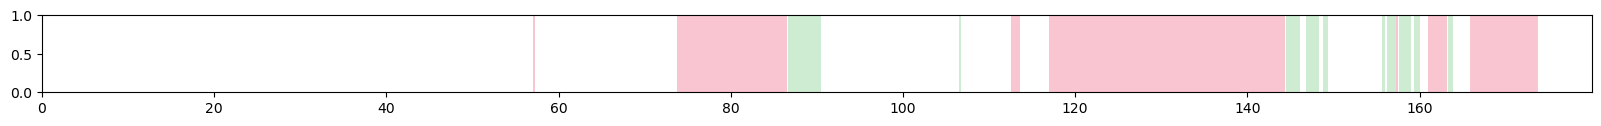

P17 icuaA


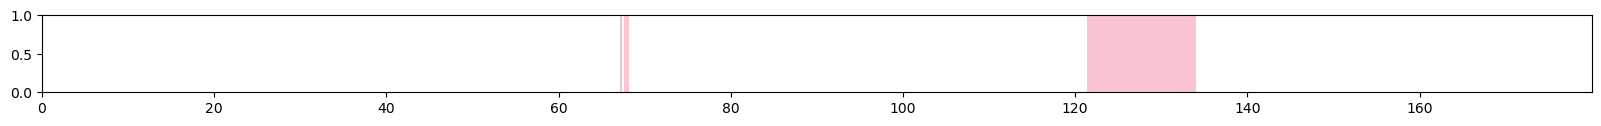

P18 icuaA


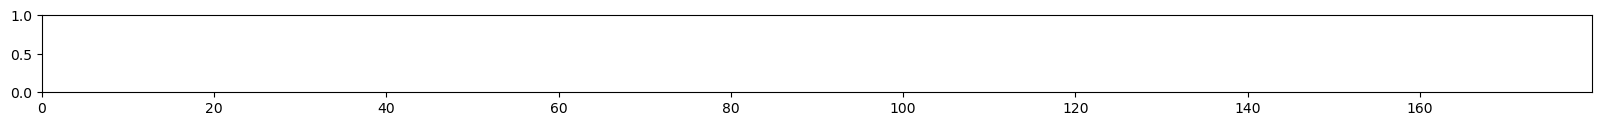

P23 icuaA


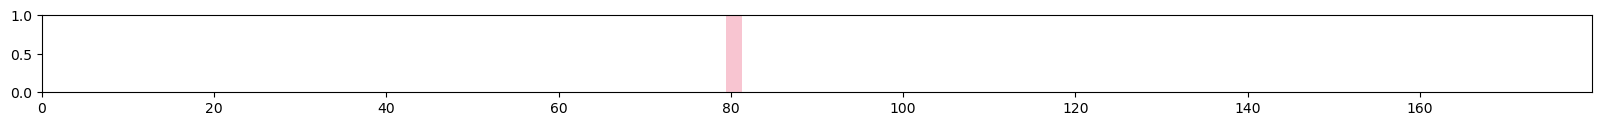

P24 icuaA


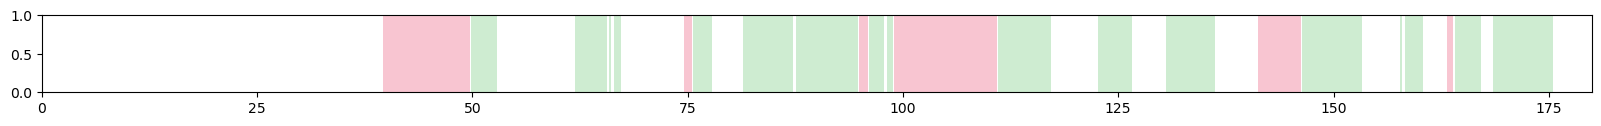

P25 icuaA


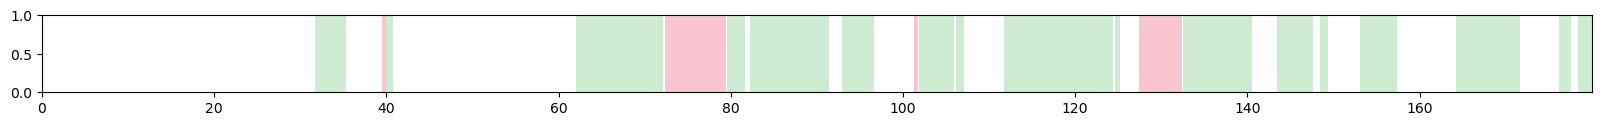

P01 icuaB


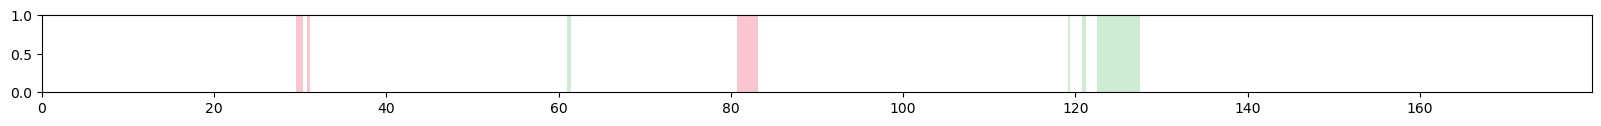

P02 icuaB


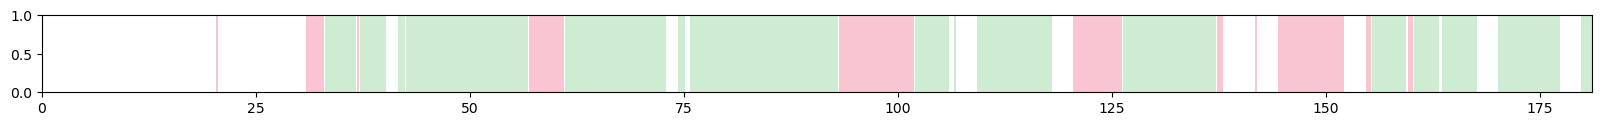

P04 icuaB


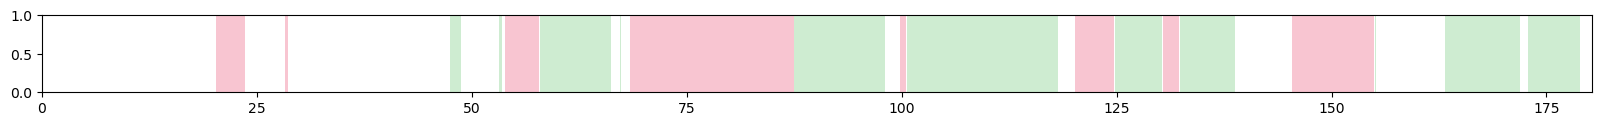

P05 icuaB


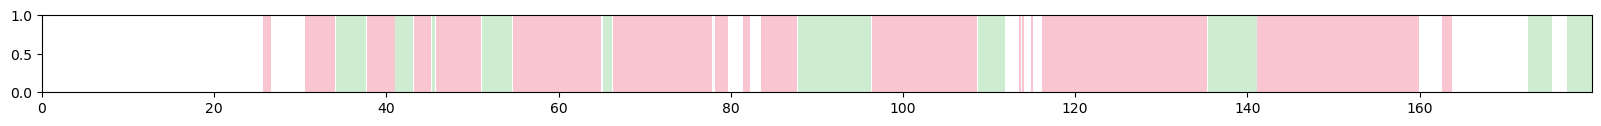

P06 icuaB


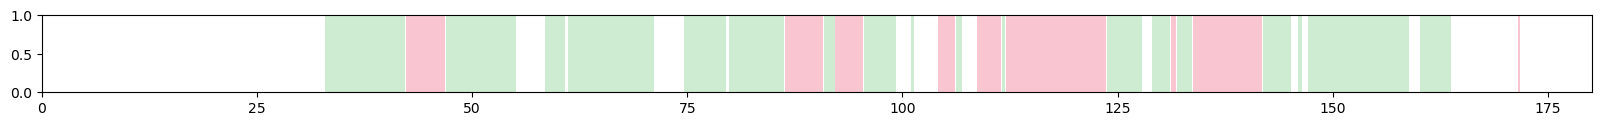

P07 icuaB
     timestamp  value task
0    20.634003   True    S
1    21.744393  False    S
2    31.975426   True    S
3    32.743639  False    S
4    53.697878   True    S
5    57.842799  False    S
6    59.508551   True    S
7    65.584785  False    S
8    82.975499   True    S
9   179.992621  False    S
10   32.895004   True    F
11   34.734326  False    F
12   36.958801   True    F
13   37.623989  False    F
14   40.452663   True    F
15   41.991494  False    F
16   69.775920   True    F
17   82.873769  False    F


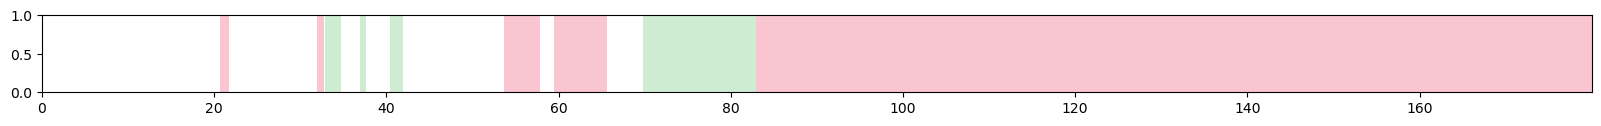

P08 icuaB


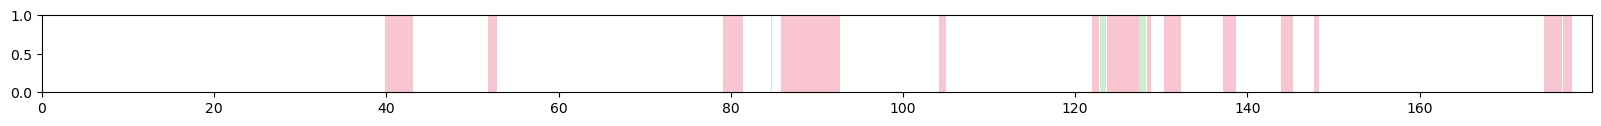

P09 icuaB


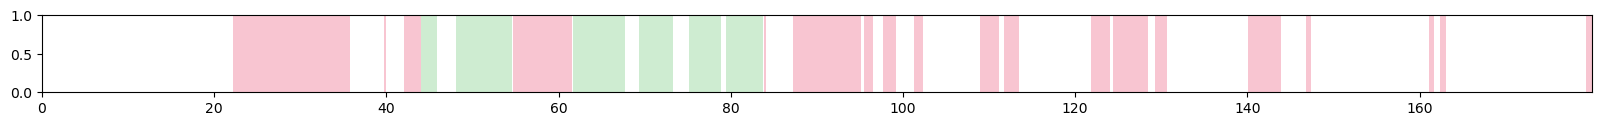

P10 icuaB


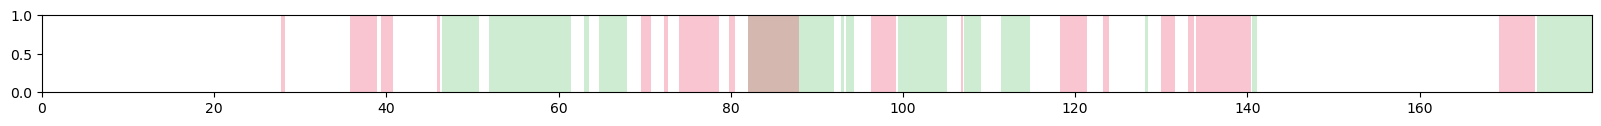

P16 icuaB


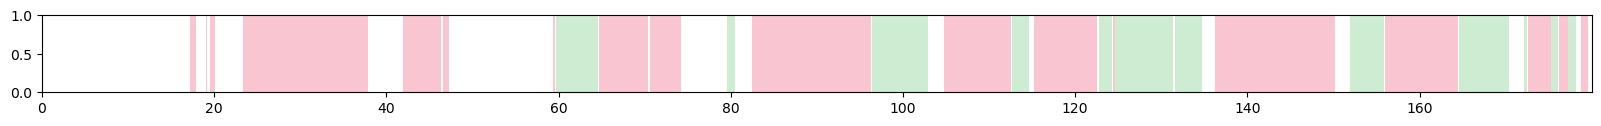

P17 icuaB


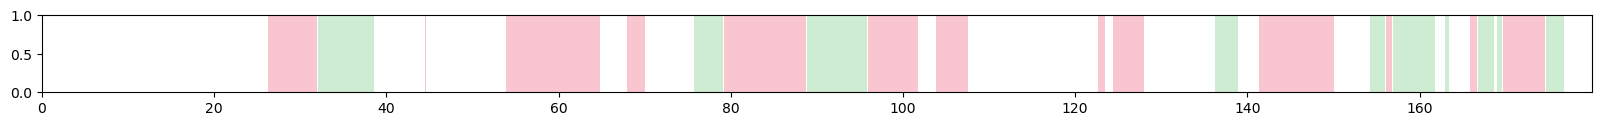

P18 icuaB


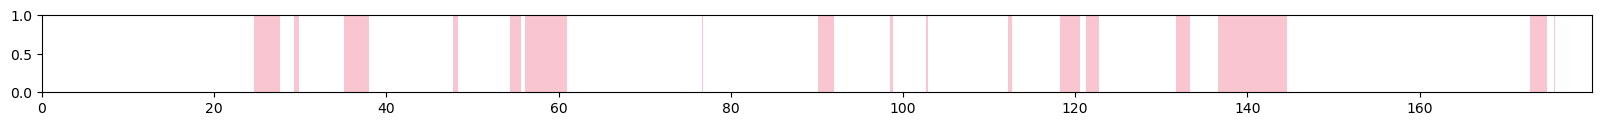

P23 icuaB


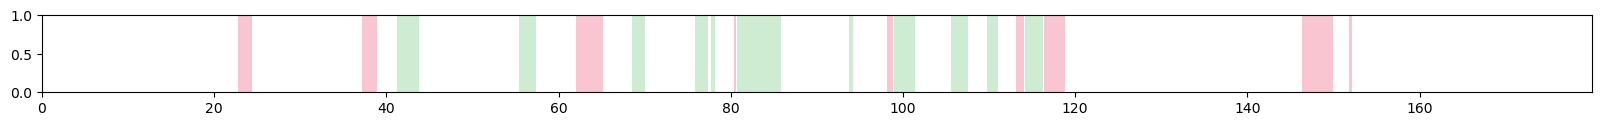

P24 icuaB


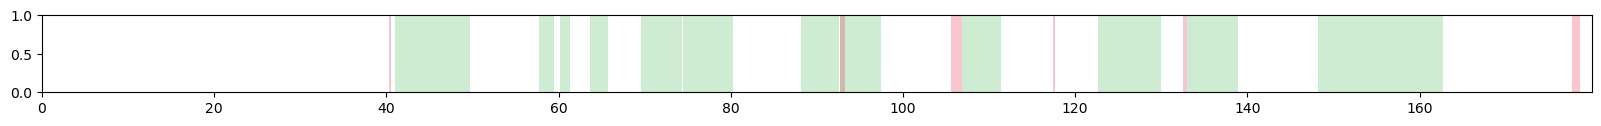

P25 icuaB


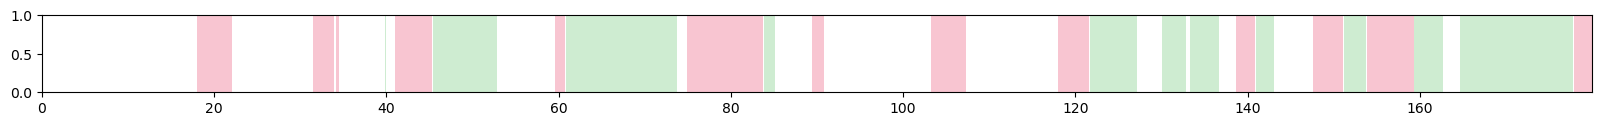

In [4]:
# plot guidance intervals (DEBUG)

import icua_analysis as ia
import pandas as pd
import matplotlib.pyplot as plt

def plot_guidance_intervals():
    for trial, par_data in ia.load_tabularised().has_eyetracking().has_guidance().groupby_trial():
        for par, data in par_data.items():
            print(par, trial)
            guidance_data = data.get('highlight_data', pd.DataFrame(columns=["timestamp", "value", "task"])) # get guidance data (it is not always present, this means no guidance was given)
            guidance_data['timestamp'] -= data['start_time']
            fig = plt.figure(figsize=(20,1))
            plt.gca().set_xlim(0, data['finish_time'] - data['start_time'])
            for task in ia.TASKS:
                tdf = guidance_data[guidance_data['task'] == task]
                tintervals = ia.compute_intervals(tdf['value'].to_numpy(), tdf['timestamp'].to_numpy(), 0, data['finish_time'] - data['start_time']).intervals
                ia.plot_intervals(tintervals, color=ia.get_task_properties(task)['color'])
            
            if par == "P07" and trial == "icuaB":
                print(guidance_data)
            plt.show()
                
plot_guidance_intervals()